In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [2]:
import numpy as np

print("Number of instances: ", X.shape[0])
print("Number of features: ", X.shape[1])
print("Target classes: ", X)
print("Feature names: ", y)
print("Missing data: ", np.isnan(X).any())

Number of instances:  4601
Number of features:  57
Target classes:        word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_in

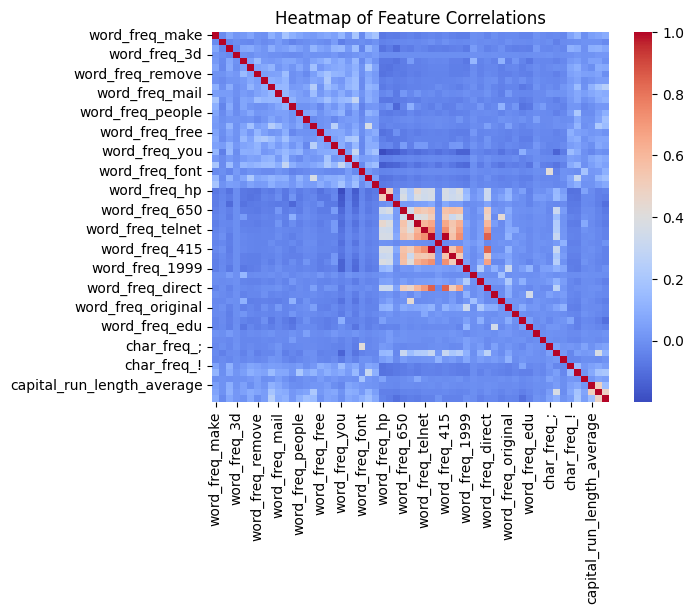

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [5]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = model.predict(X_test)
 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction is: {accuracy}")

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

The Accuracy of Prediction is: 0.8281764318630678
F1 Score: 0.8271040953068602


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


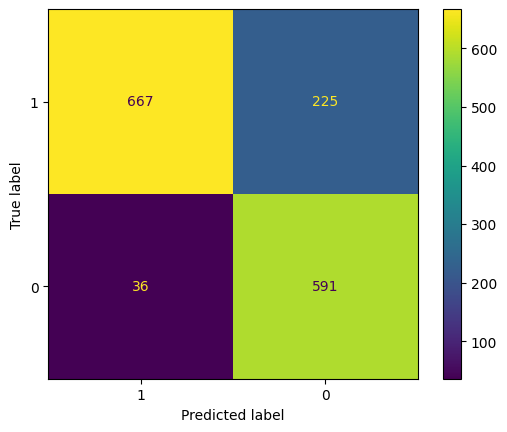

In [6]:
labels = ["1", "0"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Random Forest Method ### 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

# Evaluate the model's performance
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'F1 Score: {f1:.2f}')

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 99.93%
F1 Score: 1.00


In [8]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {scores.mean()*100:.2f}%')

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Cross-validated Accuracy: 92.85%


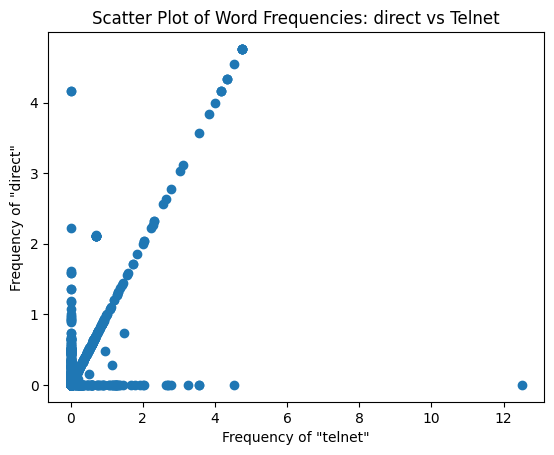

In [9]:
# Create scatter plot
plt.scatter(X['word_freq_telnet'], X['word_freq_direct'])
plt.xlabel('Frequency of "telnet"')
plt.ylabel('Frequency of "direct"')
plt.title('Scatter Plot of Word Frequencies: direct vs Telnet')
plt.show()

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, f1_score


data = spambase.data.features
target = spambase.data.targets

squeeze= target.squeeze()

features = data[['word_freq_telnet', 'word_freq_direct']]

X_train, X_test, y_train, y_test = train_test_split(features, squeeze, test_size=0.3, random_state=42)

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'LDA Accuracy: {accuracy*100:.2f}%')

QDA = QDA()
QDA.fit(X_train, y_train)
y_pred = QDA.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'QDA Accuracy: {accuracy*100:.2f}%')


LDA Accuracy: 58.65%
QDA Accuracy: 46.92%


It seems QDA and LDA are not appropriate here